📦 Downloading dataset...
Using Colab cache for faster access to the 'sample-sales-data' dataset.
✅ Path to dataset files: /kaggle/input/sample-sales-data
✅ Found CSV file: sales_data_sample.csv

✅ Dataset loaded successfully!

Preview of Dataset:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  1

/tmp/ipython-input-4278402144.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


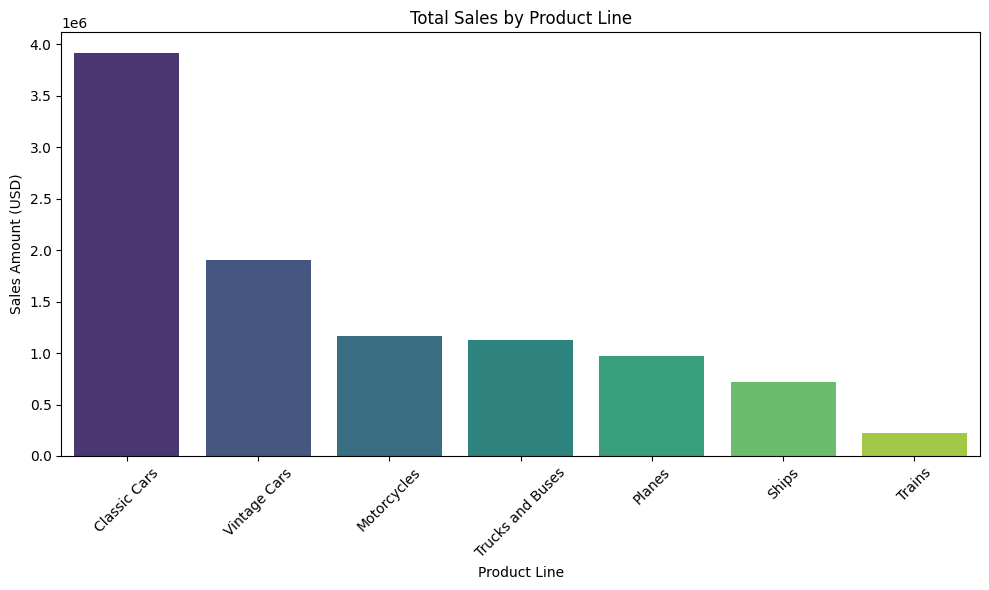

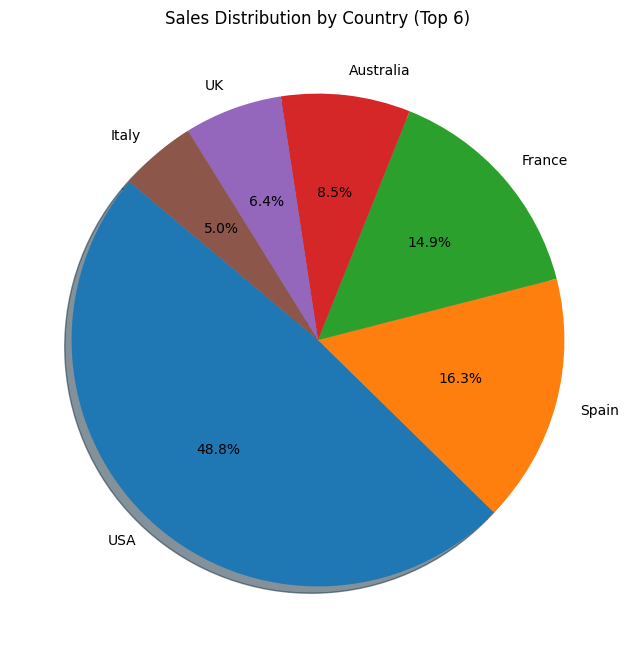

Top 5 Performing Products:
 PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
Name: SALES, dtype: float64 

Top 5 Performing Regions:
 COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64 


--- SUMMARY REPORT ---
   Total Sales  Average Sales  Max Sales  Min Sales Top Product Top Region
0  10032628.85        3553.89    14082.8     482.13    S18_3232        USA


In [4]:
# -------------------------------------------------------------
# TASK 1 - Sales Data Analysis (Final Colab Version)
# Intern: Soumili Rakshit
# Company: Cognetix Technology
# -------------------------------------------------------------

# ✅ STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# ✅ STEP 2: Download dataset from Kaggle
print("📦 Downloading dataset...")
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")
print("✅ Path to dataset files:", path)

# ✅ STEP 3: Auto-detect CSV file
files = os.listdir(path)
csv_files = [f for f in files if f.endswith(".csv")]
if len(csv_files) == 0:
    raise FileNotFoundError("❌ No CSV file found in dataset folder.")
else:
    print(f"✅ Found CSV file: {csv_files[0]}")
    file_path = os.path.join(path, csv_files[0])

# ✅ STEP 4: Load dataset safely (handle encoding issues)
try:
    data = pd.read_csv(file_path)
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

print("\n✅ Dataset loaded successfully!\n")
print("Preview of Dataset:\n", data.head(), "\n")

# ✅ STEP 5: Basic info
print("Dataset Info:\n")
print(data.info(), "\n")

# ✅ STEP 6: Basic Sales Statistics
print("------ BASIC SALES STATISTICS ------")
print("Total Sales: ", round(data['SALES'].sum(), 2))
print("Average Sales: ", round(data['SALES'].mean(), 2))
print("Maximum Sale: ", data['SALES'].max())
print("Minimum Sale: ", data['SALES'].min(), "\n")

# ✅ STEP 7: Category and region analysis
category_sales = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
region_sales   = data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

print("Sales by Product Line:\n", category_sales, "\n")
print("Sales by Country:\n", region_sales.head(), "\n")

# ✅ STEP 8: Visualization – Product Line Sales
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45)
plt.ylabel("Sales Amount (USD)")
plt.xlabel("Product Line")
plt.tight_layout()
plt.show()

# ✅ STEP 9: Visualization – Country Sales
plt.figure(figsize=(8,8))
region_sales.head(6).plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Sales Distribution by Country (Top 6)")
plt.ylabel("")
plt.show()

# ✅ STEP 10: Top-performing products & regions
top_products = data.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(5)
top_regions  = region_sales.head(5)

print("Top 5 Performing Products:\n", top_products, "\n")
print("Top 5 Performing Regions:\n", top_regions, "\n")

# ✅ STEP 11: Summary Report
summary = {
    'Total Sales': round(data['SALES'].sum(), 2),
    'Average Sales': round(data['SALES'].mean(), 2),
    'Max Sales': data['SALES'].max(),
    'Min Sales': data['SALES'].min(),
    'Top Product': top_products.index[0],
    'Top Region': top_regions.index[0]
}
summary_df = pd.DataFrame([summary])

print("\n--- SUMMARY REPORT ---")
print(summary_df)
